In [1]:
# import pandas as pd
# import numpy as np
# import math
import matplotlib.pyplot as plt
# import matplotlib
# from lmfit import models
from utils.scopeutil import *
from utils.OOMFormatter import OOMFormatter
from models.T1_simple_model import *

<AxesSubplot:>

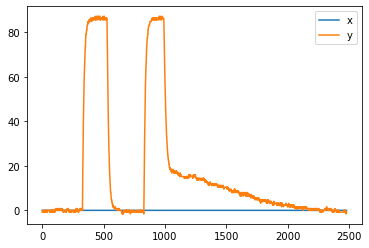

In [2]:
# Ik haal een bepaalde meting op en plot het gelijk
df = get_df(stof=STOF_KOPERCHLORIDE_A,
       verhouding="1_0",
       T=T1,
       delay=500,
       signal_index=SI_SIGNAL)

df.plot()

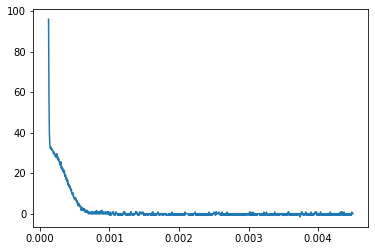

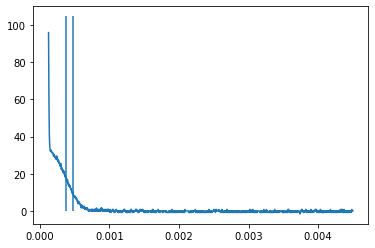

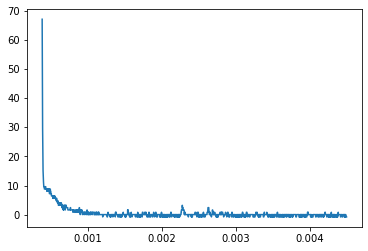

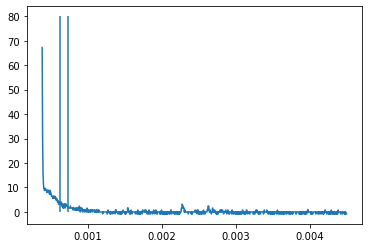

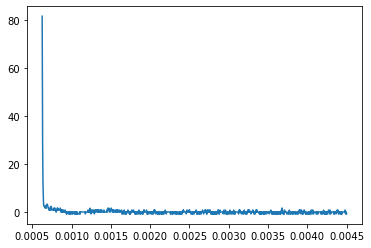

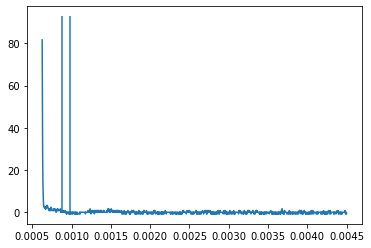

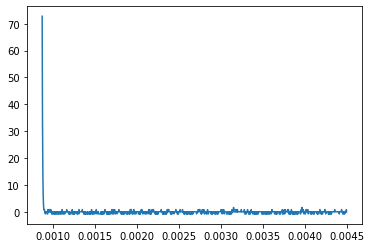

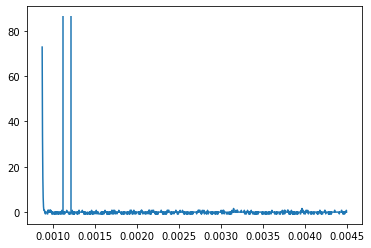

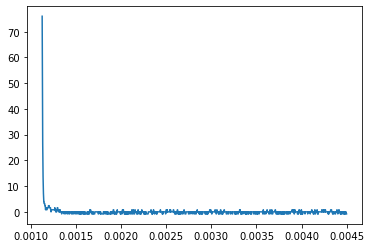

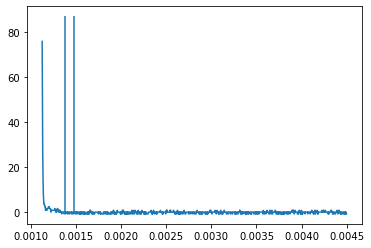

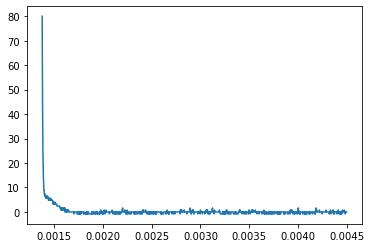

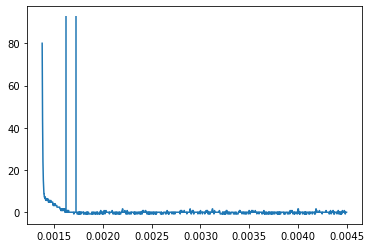

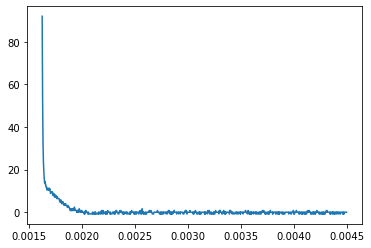

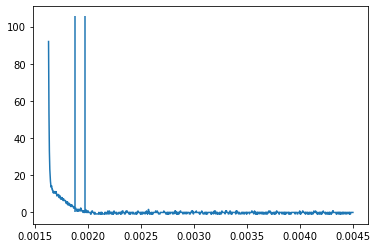

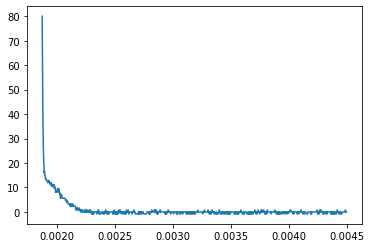

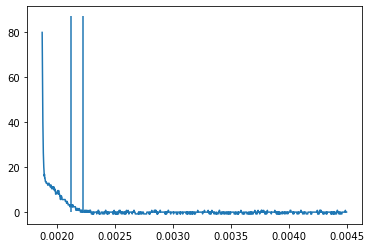

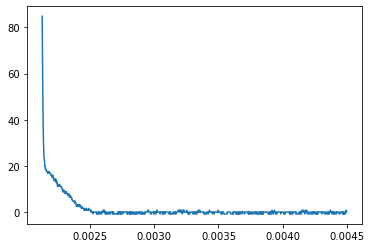

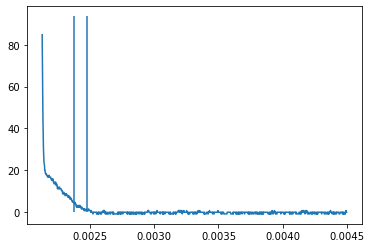

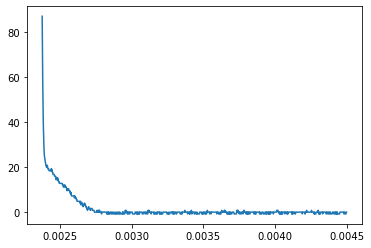

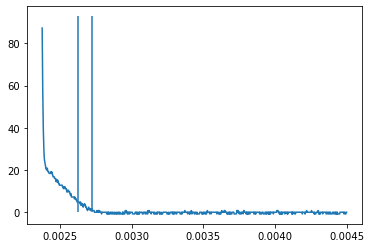

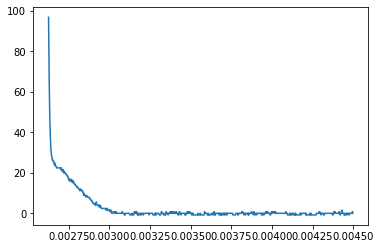

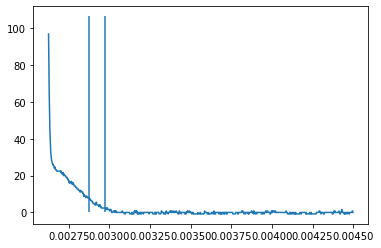

[13.7280003021, 2.736000067, 0.06400000095368, -0.27200000405314, -0.1600000023842, 0.12800000190736, 1.18400001724524, 1.61600003929156, 2.44800004830736, 2.94400005367684, 4.4160000864]
[400, 650, 900, 1150, 1400, 1650, 1900, 2150, 2400, 2650, 2900]
2.44800004830736


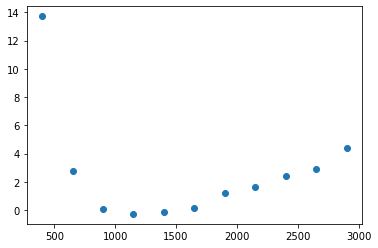

In [4]:
# Voor onze doelen is het super handig om alle dataframes
# van een bepaald reeks metingen op te halen.
# Ik plot hier steeds de data van de T1 meting van CuCl met verhouding 1:4
# Als de (delay, df) stuk in de for loop magisch lijkt omdat je er zelf niet op was gekomen.
# ik heb overal voorbeelden geplaatst bij de functies zelf!
# In visual studio code kun je dus hoveren met je muis over de functie get_df_of_all_delays en dan
# krijg je mijn voorbeelden te zien.
# In de notebook in je browser kun je gewoon naar de functie zelf gaan (ze staan allemaal in util/scopeutil.py)

Mz_lijst_koperchloride_A_1_0 = []
delays = []

for (delay, df) in get_df_of_all_delays(
        stof=STOF_KOPERCHLORIDE_ACETOON,
        verhouding="1_1",
        T=T1,
        signal_index=SI_SIGNAL):
    # df.plot(title=f"Plot van meting op t={delay}us")

    mz = distill_df(df, v=True)
    Mz_lijst_koperchloride_A_1_0.append(mz)

    delays.append(delay)

print(Mz_lijst_koperchloride_A_1_0)
print(delays)
print(Mz_lijst_koperchloride_A_1_0[8])

# fit_T1 = model_eerstetijd.fit(Mz_lijst_koperchloride_A_1_0,t=delays, evenwichtsmagnetisatie=Mz_lijst_koperchloride_A_1_0[8])

plt.scatter(delays, Mz_lijst_koperchloride_A_1_0)

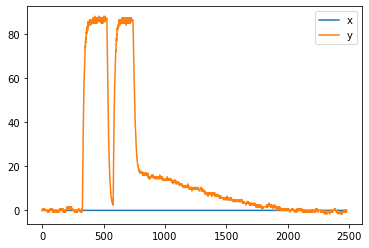

In [ ]:
# Ik heb super veel voorbeelden en documentatie geschreven in het bestand utils/scopeutil.py
# Daar komt dit voorbeeld vandaan, lees het vooral! :)

# Omdat we niet consistent waren met de verhoudingen heb ik een functie
# geschreven waarmee je de mogelijke verhoudingen kan ophalen
# voor een bepaalde stof
mogelijke_verhoudingen_van_koperchloride = get_verhoudingen(STOF_KOPERCHLORIDE_A)

# Hier ga ik door al die verhoudingen heen om een plot
# te maken van de bijbehorende meting (met T=T1)
for verhouding in mogelijke_verhoudingen_van_koperchloride:
    # De delays zijn ook onregelmatig dus ik heb er ook een functie voor geschreven
    # hiermee haal ik alle mogelijke delays op voor CuCl, T1 en de huidige
    # verhouding (we zijn aan het loopen door alle verhoudingen heen)
    mogelijke_delays_van_koperchloride = get_delays(STOF_KOPERCHLORIDE_A, verhouding, T1)
    # ik wil gewoon even iets plotten dus ik kies maar de eerste verhouding steeds
    eerste_delay = mogelijke_delays_van_koperchloride[0]

    # ik haal de dataframe op en plot het gelijk
    df = get_df(STOF_KOPERCHLORIDE_A, verhouding, T1, eerste_delay, SI_SIGNAL)
    df.plot()